In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
print(tf.__version__)

1.14.0


In [6]:
fash_train = pd.read_csv('fashion-mnist_train.csv')
fash_test  = pd.read_csv('fashion-mnist_test.csv')

In [7]:
fash_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fash_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Selecting all the columns but first
features = fash_train[fash_train.columns[1:]]
features.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
labels = fash_train['label']
labels.describe(include = 'all')

count    60000.000000
mean         4.500000
std          2.872305
min          0.000000
25%          2.000000
50%          4.500000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [12]:
features.shape

(60000, 784)

In [13]:
fashion_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"pixels": features.values/255},
        y=labels,
        batch_size=100,
        num_epochs=3,
        shuffle=True)

In [14]:
feature_columns = [tf.feature_column.numeric_column("pixels", shape=784)]

In [15]:
classifier = tf.estimator.LinearClassifier(
                feature_columns=feature_columns, 
                n_classes=10,
                model_dir="./models/linear1"
                )

In [16]:
classifier

In [18]:
classifier.train(input_fn=fashion_input_fn)

W0911 10:41:27.059991 14064 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0911 10:41:27.074950 14064 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0911 10:41:27.076946 14064 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_estimator\python\estimator\inputs\queues\feeding_functions.py:500: add_queue_runner (from

In [19]:
features = fash_test[fash_test.columns[1:]]
labels = fash_test["label"]

evaluate_input_fn = tf.estimator.inputs.numpy_input_fn(
        x={"pixels": features.values/255},
        y=labels,
        batch_size=100,
        num_epochs=1,
        shuffle=False)

In [20]:
classifier.evaluate(input_fn=evaluate_input_fn)["accuracy"]

W0911 10:45:56.547666 14064 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


0.8481

In [22]:
# Bonus round 1: predictions
features = fash_test[fash_test.columns[1:]]
labels = fash_test["label"]

predict_input_fn = tf.estimator.inputs.numpy_input_fn(        
        x={'pixels': features.iloc[5000:5005].values/255},
        batch_size=1,
        num_epochs=1,
        shuffle=False)
predictions = classifier.predict(input_fn=predict_input_fn)

for prediction in predictions:
    print("Predictions:    {} with probabilities {}\n".format(
        prediction["classes"], prediction["probabilities"]))
print('Expected answers values: \n{}'.format(
    labels.iloc[5000:5005]))

Predictions:    [b'1'] with probabilities [3.8978610e-06 9.9992681e-01 4.1763901e-06 5.4911041e-05 1.0099835e-05
 8.1683155e-19 1.2773677e-08 3.3928052e-13 1.6585888e-08 5.0292909e-16]

Predictions:    [b'2'] with probabilities [6.88601099e-03 1.94945809e-04 9.13516760e-01 2.10295155e-04
 9.78829688e-04 4.37299519e-17 7.81160295e-02 4.19980379e-27
 9.71678819e-05 1.16049864e-23]

Predictions:    [b'4'] with probabilities [1.08086066e-02 1.15950010e-04 7.80572966e-02 1.72667671e-02
 5.85206985e-01 1.27799524e-11 3.05128157e-01 1.13812588e-15
 3.41622741e-03 1.95607463e-16]

Predictions:    [b'1'] with probabilities [1.2270183e-07 9.9998367e-01 8.6984943e-07 1.4772930e-05 5.8925929e-07
 2.1628160e-22 3.7330250e-09 2.6677675e-15 2.1639804e-10 4.6077465e-16]

Predictions:    [b'9'] with probabilities [5.7500535e-15 8.3583226e-18 9.7113168e-14 5.0002896e-15 2.0286479e-15
 1.8865460e-03 2.2365336e-14 4.4649857e-04 6.7258874e-09 9.9766695e-01]

Expected answers values: 
5000    1
5001    2
50

In [23]:
# Bonus round 2: visualizing our predictions
# Import, setup, and a utility for int->string class conversion
import matplotlib.pyplot as plt
%matplotlib inline
class_table = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

def get_label_cls(label):
    """given an int label range [0,9], return the string description of that label"""
    return class_table[label]

get_label_cls(3)

'Dress'

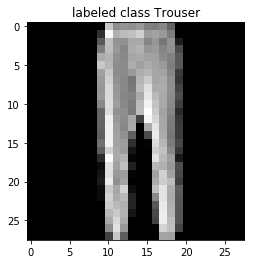

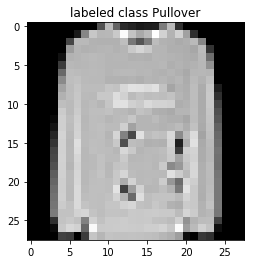

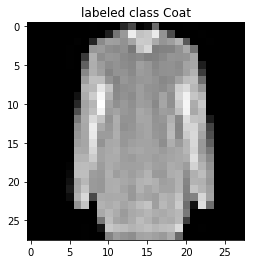

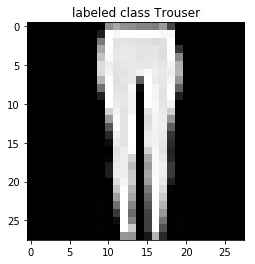

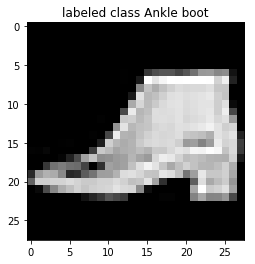

In [26]:
for i in range(5000,5005): 
    sample = np.reshape(fash_test[fash_test.columns[1:]].iloc[i].values/255, (28,28))
    plt.figure()
    plt.title("labeled class {}".format(get_label_cls(fash_test["label"].iloc[i])))
    plt.imshow(sample, 'gray')

In [27]:
DNN = tf.estimator.DNNClassifier(
                feature_columns=feature_columns, 
                hidden_units=[40,30,20],
                n_classes=10,
                model_dir="./models/deep1"
                )

In [29]:
DNN.train(input_fn=fashion_input_fn)

W0911 10:56:23.902884 14064 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0911 10:56:24.671100 14064 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\adagrad.py:76: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [30]:
DNN.evaluate(input_fn=evaluate_input_fn)["accuracy"]

0.8534